## Getting familiar with OpenCV operations
### Using matplotlib to display images 

In [1]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2 as c
from PIL import Image
import imutils as iu
%matplotlib inline

In [2]:
#read image opencv-logo
#display shape and size of the image


ocvlogo = c.imread('opencv-logo.png')
(h, w, d) = ocvlogo.shape
print("width={}, height={}, depth={}".format(w, h, d))

width=600, height=739, depth=3


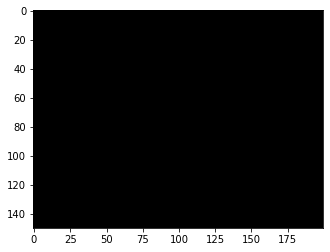

In [3]:
#create a numpy array of zeroes that is 150 pixels tall, 200 pixels wide
#display this black image
#Similarly create a numpy array on ones with above dimensions and display the white image

#Answer

height = 150
width = 200

# create numpy array

np_array_zero = np.zeros([height, width,3], dtype='uint8')

# for Black

np_array_zero[:,:] = [0,0,0]

# create balck image

blackimage = Image.fromarray(np_array_zero)
plt.imshow(blackimage)

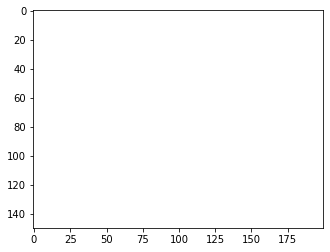

In [4]:
# create ones numpy array

np_array_one = np.ones([height, width,3], dtype='uint8')

# for White

np_array_one[:,:] = [255,255,255]

# create white image

whiteimage = Image.fromarray(np_array_one)
plt.imshow(whiteimage)

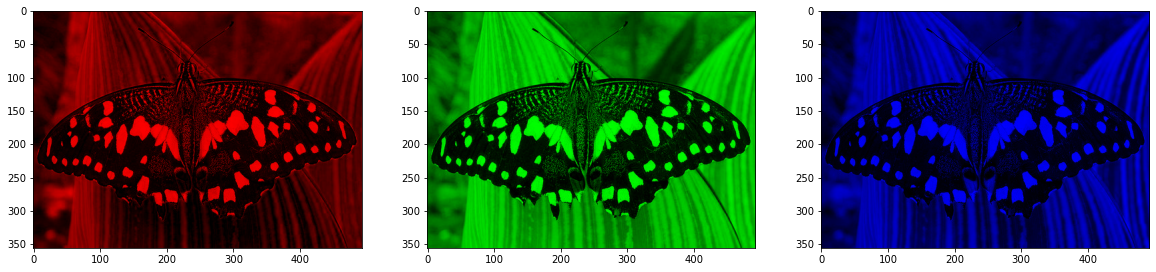

In [5]:
#read the butterfly image and display the r,g,b channels of the image
#Then display the butterfly image in the HSV color space

#Answer

bfly = c.imread('butterfly.jpg')

b = bfly.copy()
b[:, :, 0] = 0
b[:, :, 1] = 0


g = bfly.copy()
g[:, :, 0] = 0
g[:, :, 2] = 0

r = bfly.copy()
r[:, :, 1] = 0
r[:, :, 2] = 0

fig1, (a1,a2,a3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20))
a1.imshow(r)
a2.imshow(g)
a3.imshow(b)

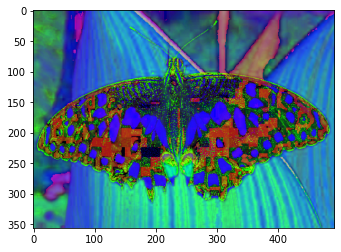

In [6]:
bfly_hsv = c.cvtColor(bfly, c.COLOR_BGR2HSV)
plt.imshow(bfly_hsv)

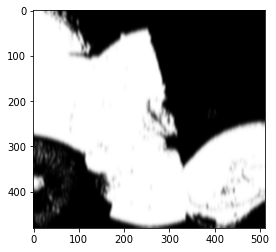

In [7]:
#read in the thresh image, perform thresholding by using gaussian blur with thresholds 5,55
#then perform dilation, erosion, opening & closing using a 5x5 kernel with 1 iteration on the original thresh image
#Finally apply canny edge detection - experiment using wide and narrow thresholds 
#(so just 2 images in total one wide and one narrow)

#Answer

thresh = c.imread('thresh.jpg')
GaussBlur = c.GaussianBlur(thresh, (5,55), c.BORDER_DEFAULT)
plt.imshow(GaussBlur)

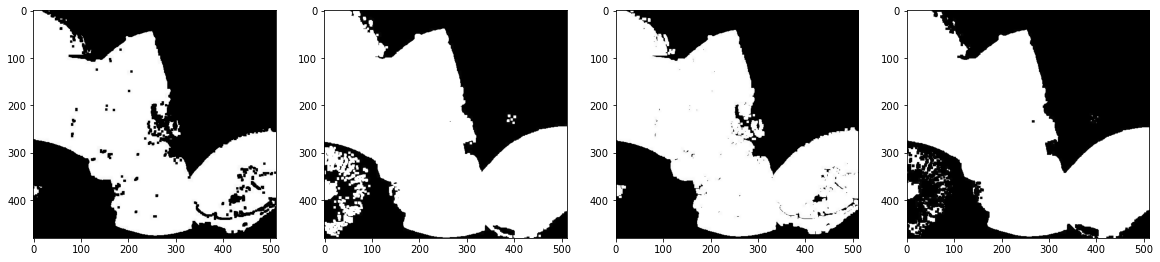

In [8]:
kernel = np.ones((5,5),np.uint8)
erosion = c.erode(thresh, kernel, iterations=1) 
dilation = c.dilate(thresh, kernel, iterations=1) 
opening = c.morphologyEx(thresh, c.MORPH_OPEN, kernel) 
closing = c.morphologyEx(thresh, c.MORPH_CLOSE, kernel)
fig, (a1,a2,a3,a4) = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 20))
a1.imshow(erosion)
a2.imshow(dilation)
a3.imshow(opening)
a4.imshow(closing)

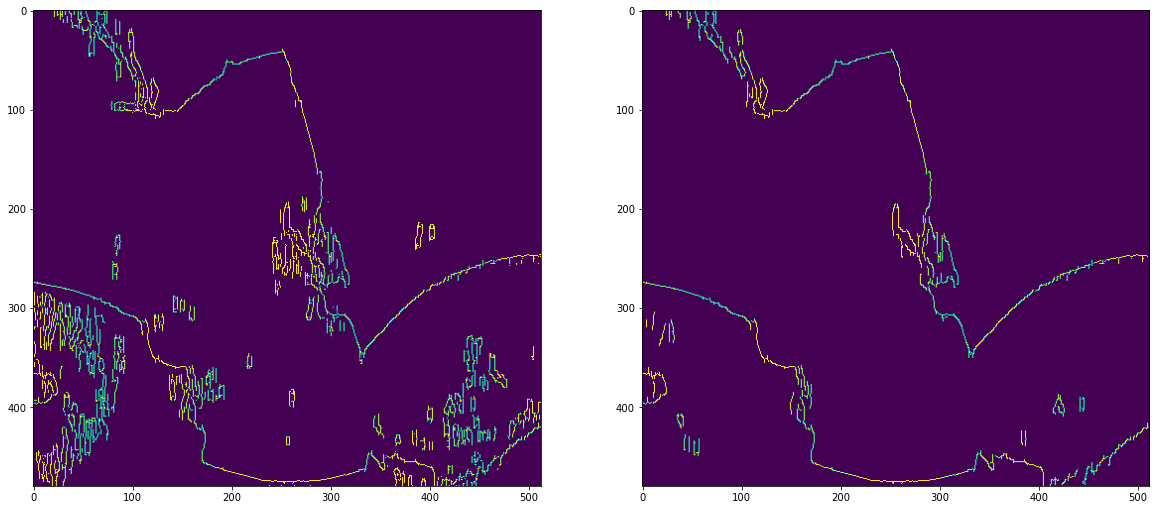

In [9]:
edge1 = c.Canny(image=GaussBlur, threshold1=5, threshold2=50)
edge2 = c.Canny(image=GaussBlur, threshold1=100, threshold2=200)
fig, (a1,a2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 20))
a1.imshow(edge1)
a2.imshow(edge2)

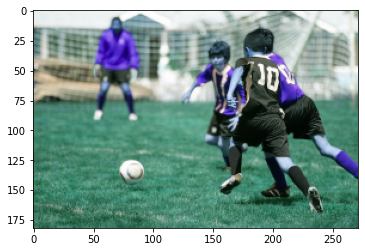

In [10]:
#read in the players image
#Perform scaling using resize method
#a) half the image using dim=(0,0), fx=0.5, fy=0.5
#b) stretch the image to dim = (600,600)
#c) stretch the image to dim = (600,600 using interpolation=cv2.INTER_NEAREST

#Answer

plyr = c.imread('players.jpg')

# displaying the half image

half = c.resize(plyr, (0,0), fx=0.5, fy=0.5)
plt.imshow(half)

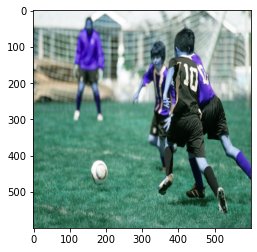

In [11]:
# strech the image to dim=(600,600)

strch = c.resize(plyr, (600,600), interpolation=c.INTER_AREA)
plt.imshow(strch)

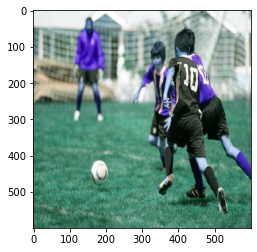

In [12]:
# stretch the image to dim = (600,600) using interpolation=cv2.INTER_NEAREST

strch2 = c.resize(plyr, (600,600), interpolation=c.INTER_NEAREST)
plt.imshow(strch2)

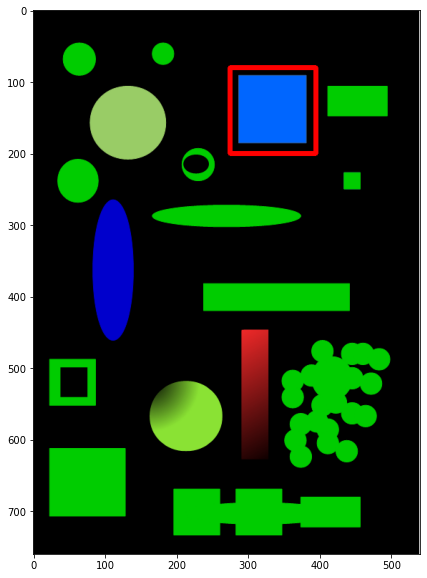

In [13]:
#read in the detect_blob image
#then draw a box shape around the blue solid box in the image that is your region of interest
#crop your region of interest
#and then rotate it 45 degrees so that it is not clipped

#Answer
blob = c.imread('detect_blob.png')
# plt.imshow(c.cvtColor(blob, c.COLOR_BGR2RGB))
blob2 = blob.copy()
rectangle = c.rectangle(blob2, pt1 = (275,80), pt2 = (395,200), 
              color = (0, 0, 255), thickness = 5)
plt.figure(figsize=(10,10))
plt.imshow(c.cvtColor(rectangle, c.COLOR_BGR2RGB))

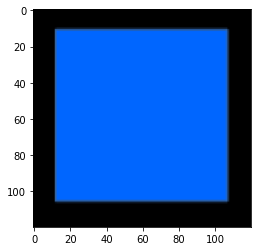

In [14]:
blobcrop = blob.copy()
cropped = blobcrop[80:200,275:395]
plt.imshow(c.cvtColor(cropped, c.COLOR_BGR2RGB))
plt.show()

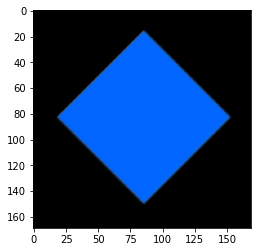

In [15]:
# (h, w, d) = cropped.shape
# center = (w //2, h//2 )
# M = c.getRotationMatrix2D(center, -45, 1.0)
# rotated = c.warpAffine(cropped , M, (w, h))
# plt.imshow(c.cvtColor(rotated, c.COLOR_BGR2RGB))

rotate = iu.rotate_bound(cropped, 45)
plt.imshow(c.cvtColor(rotated, c.COLOR_BGR2RGB))

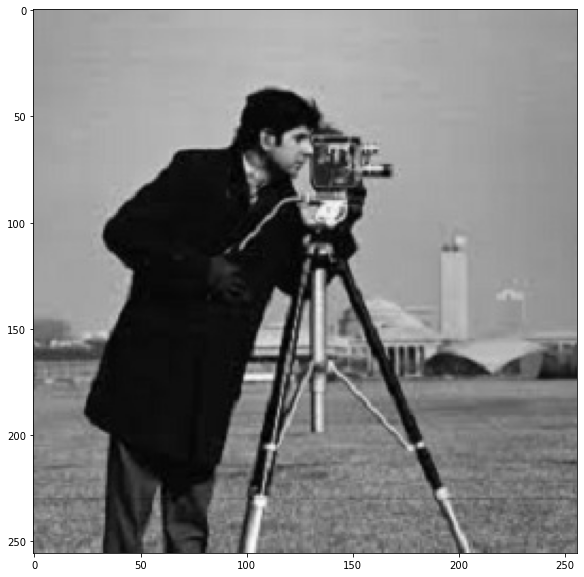

In [16]:
#read in the cameraman image
#Here we want to implement HOG to compute HOG descriptors of the image
#For HOG, use these as arguments orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1)
#Display the original image as well as the resultant image

from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

#Answer
cameraman = c.imread('cameraman.jpg')
plt.figure(figsize=(10,10))
plt.imshow(cameraman)

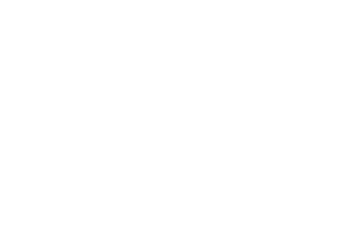

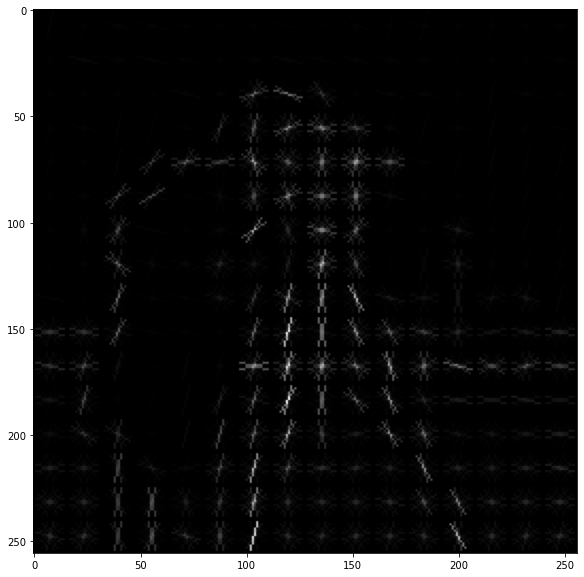

In [17]:
fd, hog_image = hog(cameraman, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1),visualize=True, multichannel=True)

plt.axis("off")
plt.figure(figsize=(10, 10))
plt.imshow(hog_image, cmap="gray")
plt.show()

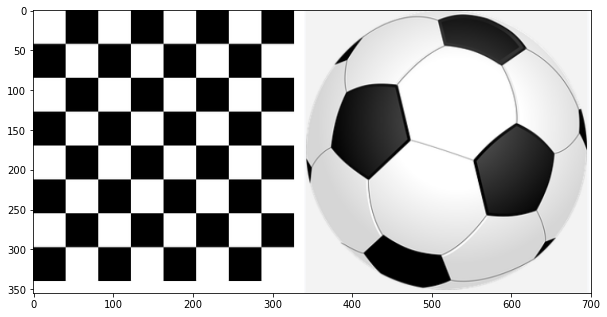

In [18]:
#read in the chess_football image
#Here we want to implement Harris Corner detection
#use  k =0.001
#Display the original image as well as the resultant image

#Answer
chessfb = c.imread('chess_football.png')
#display original image
plt.figure(figsize=(10, 10))
plt.imshow(c.cvtColor(chessfb, c.COLOR_BGR2RGB))
plt.show()

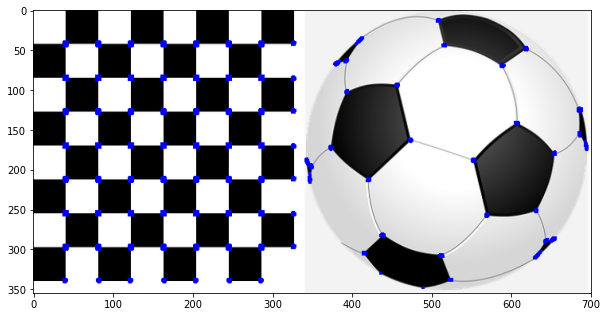

In [19]:
chessfb_gray = c.cvtColor(chessfb, c.COLOR_BGR2GRAY)  
chessfb_gray = np.float32(chessfb_gray)
hcd_img = c.cornerHarris(chessfb_gray, 3, 5, 0.001)  
hcd_img = c.dilate(hcd_img, None)
chessfb[hcd_img > 0.01 * hcd_img.max()]=[0, 0, 255]
plt.figure(figsize=(10, 10))
plt.imshow(chessfb) 
plt.show()